In [267]:
# Import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report,confusion_matrix
from sklearn.utils import resample

In [268]:
%matplotlib inline

In [269]:
df = pd.read_csv('../Data/df_cleaned')

In [270]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [271]:
df= df.dropna()

In [272]:
# Check for label being balance
# As we see the label are imbalanced 
df['target'].value_counts()

0    26629
1     3859
Name: target, dtype: int64

In [273]:
counter = Counter(df['target'])
counter

Counter({0: 26629, 1: 3859})

In [274]:
# Splite the dataset base on the lable
df_sample_1 = df[df['target'] == 1]
df_sample_0 = df[df['target'] == 0]

In [275]:
# Balance the label "1" by resampling it
# As we see the label 1 is now equal to label 0
df_1_resmp = resample(df_sample_1,n_samples=26629,replace=True,random_state=101)
df_1_resmp['target'].value_counts()

1    26629
Name: target, dtype: int64

In [276]:
# Merge the data set 
df = pd.concat([df_1_resmp,df_sample_0])
df['target'].value_counts()

1    26629
0    26629
Name: target, dtype: int64

# Convert the object data to the integer as much as possible

In [277]:

# Convert the month to the values using map function
month_dict = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month'] = df['month'].map(month_dict)
df['month']

17452    11
21844     5
21247     4
22624     5
12660     8
         ..
30480    11
30482    11
30484    11
30485    11
30487    11
Name: month, Length: 53258, dtype: int64

In [278]:
df['day_of_week']

17452    wed
21844    tue
21247    thu
22624    thu
12660    wed
        ... 
30480    fri
30482    fri
30484    fri
30485    fri
30487    fri
Name: day_of_week, Length: 53258, dtype: object

In [279]:
# Convert the day of week to the values using the map function
dow = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}
df['day_of_week'] = df['day_of_week'].map(dow)
df['day_of_week']

17452    3
21844    2
21247    4
22624    4
12660    3
        ..
30480    5
30482    5
30484    5
30485    5
30487    5
Name: day_of_week, Length: 53258, dtype: int64

In [280]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

# Convert the object  feature to the integer using the get_dummy function

In [281]:
# pass all feature to the get_dummy 
X_dummy = pd.get_dummies(df.drop('target',axis=1),drop_first=True)
#X_dummy.isnull().sum()

# Training the data

In [282]:
# Select the X and y 
X = X_dummy.values
X

array([[32., 11.,  3., ...,  0.,  1.,  0.],
       [34.,  5.,  2., ...,  0.,  1.,  0.],
       [31.,  4.,  4., ...,  0.,  0.,  1.],
       ...,
       [46., 11.,  5., ...,  0.,  1.,  0.],
       [56., 11.,  5., ...,  0.,  1.,  0.],
       [74., 11.,  5., ...,  0.,  0.,  0.]])

In [283]:
y = df['target'].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [284]:
# Define the X and y features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scale the data

In [285]:
scaler = MinMaxScaler()

In [286]:
# Fit and transform X_train and transform the X_test preventing the data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(37280, 36)

# Model Selection

In [287]:
model = Sequential()
# First layer
model.add(Dense(36,activation='relu'))
model.add(Dropout(0.5))
# Second Layer
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9,activation='relu'))
model.add(Dropout(0.5))
# As it's a classificication task we have to select last activation as "sigmoid"
model.add(Dense(1,activation='sigmoid'))
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy')

In [244]:
# Define Early stopping function to prevent overfitting
# monitor= Obseves the val_loss value of validation data
# mode= Minimizes the val_loss
# patience= Gives the opportunity to obserce the +25 epoch after start rising the val_loss
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [288]:
# Fit the model on the training data and mointor the validation data
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=500,callbacks=[early_stop])

Epoch 1/500
1165/1165 [==============================] - 1s 1ms/step - loss: 0.6420 - val_loss: 0.5455
Epoch 2/500
1165/1165 [==============================] - 1s 894us/step - loss: 0.5372 - val_loss: 0.3890
Epoch 3/500
1165/1165 [==============================] - 1s 949us/step - loss: 0.4496 - val_loss: 0.3454
Epoch 4/500
1165/1165 [==============================] - 1s 929us/step - loss: 0.4239 - val_loss: 0.3381
Epoch 5/500
1165/1165 [==============================] - 1s 963us/step - loss: 0.4048 - val_loss: 0.3299
Epoch 6/500
1165/1165 [==============================] - 1s 901us/step - loss: 0.4019 - val_loss: 0.3248
Epoch 7/500
1165/1165 [==============================] - 1s 944us/step - loss: 0.3909 - val_loss: 0.3210
Epoch 8/500
1165/1165 [==============================] - 1s 916us/step - loss: 0.3864 - val_loss: 0.3183
Epoch 9/500
1165/1165 [==============================] - 1s 914us/step - loss: 0.3794 - val_loss: 0.3192
Epoch 10/500
1165/1165 [==============================] -

1165/1165 [==============================] - 1s 831us/step - loss: 0.3504 - val_loss: 0.2910
Epoch 79/500
1165/1165 [==============================] - 1s 819us/step - loss: 0.3485 - val_loss: 0.2929
Epoch 80/500
1165/1165 [==============================] - 1s 827us/step - loss: 0.3504 - val_loss: 0.2907
Epoch 81/500
1165/1165 [==============================] - 1s 818us/step - loss: 0.3493 - val_loss: 0.2940
Epoch 82/500
1165/1165 [==============================] - 1s 811us/step - loss: 0.3525 - val_loss: 0.2967
Epoch 83/500
1165/1165 [==============================] - 1s 775us/step - loss: 0.3483 - val_loss: 0.2904
Epoch 84/500
1165/1165 [==============================] - 1s 792us/step - loss: 0.3497 - val_loss: 0.2906
Epoch 85/500
1165/1165 [==============================] - 1s 820us/step - loss: 0.3494 - val_loss: 0.3047
Epoch 86/500
1165/1165 [==============================] - 1s 789us/step - loss: 0.3464 - val_loss: 0.2889
Epoch 87/500
1165/1165 [==============================] - 1

Epoch 155/500
1165/1165 [==============================] - 1s 831us/step - loss: 0.3434 - val_loss: 0.2840
Epoch 156/500
1165/1165 [==============================] - 1s 868us/step - loss: 0.3414 - val_loss: 0.2842
Epoch 157/500
1165/1165 [==============================] - 1s 936us/step - loss: 0.3409 - val_loss: 0.2896
Epoch 158/500
1165/1165 [==============================] - 1s 883us/step - loss: 0.3436 - val_loss: 0.2882
Epoch 159/500
1165/1165 [==============================] - 1s 821us/step - loss: 0.3437 - val_loss: 0.2858
Epoch 160/500
1165/1165 [==============================] - 1s 822us/step - loss: 0.3432 - val_loss: 0.2834
Epoch 161/500
1165/1165 [==============================] - 1s 818us/step - loss: 0.3455 - val_loss: 0.2848
Epoch 00161: early stopping


<AxesSubplot:>

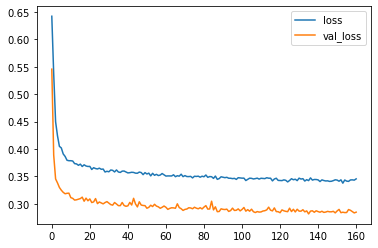

In [289]:
# Check the val_loss of the training and validation data
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [290]:
prd = model.predict_classes(X_test)

In [291]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      7922
           1       0.84      0.95      0.89      8056

    accuracy                           0.89     15978
   macro avg       0.89      0.89      0.89     15978
weighted avg       0.89      0.89      0.89     15978

